## Titanic Dataset Classification

We will be using TensorFlow 2.x to train a 4-layered neural network on the classification of the titanic dataset.

### Tools required

* [Python 3.x](https://www.python.org/downloads/).

* [TensorFlow 2](https://www.tensorflow.org/) - An open source machine learning framework built by Google and pre-bundled with Keras. It is mainly geared towards Deep Learning.

* [NumPy](https://numpy.org/) - A scietific computing library for high level linear alegbra.

* [Matplotlib](https://matplotlib.org/) - A visualization library that is used to create high-quality graphs, charts, and figures in Python.

* [Scikit-learn](https://scikit-learn.org/stable/) - A free machine learning framework that provides simple and efficient tools for data mining and data analysis. It can also validate models of other frameworks such as TensorFlow. Unlike TensorFlow it is mainly geared towards traditional Machine Learning.

* [Pandas](https://pandas.pydata.org/) - A data analysis library for processing CSV files in Python.

#### Note: To install the following packages simply create a Python environment from 3.5 - 3.8 (I am using Python 3.8 in this experiment), activate the environment and install the tools using the command `pip install tensorflow matplotlib scikit-learn pandas`.

### Step 1: Loading the Packages

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import sklearn
import numpy as np
import pandas as pd

### Step 2: Loading the Dataset

In [2]:
TRAIN_DATA_URL = "https://storage.googleapis.com/tf-datasets/titanic/train.csv"
TEST_DATA_URL = "https://storage.googleapis.com/tf-datasets/titanic/eval.csv"

train_file_path = tf.keras.utils.get_file("train.csv", TRAIN_DATA_URL)
test_file_path = tf.keras.utils.get_file("eval.csv", TEST_DATA_URL)

### Step 3: Converting the dataset to Numpy array (Data Preprocessing)

Because TensorFlow models requires the inputs to be numpy arrays

In [3]:
train = pd.read_csv(train_file_path)
test = pd.read_csv(test_file_path)

np.set_printoptions(precision=3, suppress=True)

df = pd.concat([train, test])

df = df.drop(['embark_town', 'fare', 'n_siblings_spouses', 'parch'], axis=1)

X = df.values
y = df['survived'].values

X = np.delete(X, 0, axis=1)

from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
X = enc.fit_transform(X)

df.info()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.22, random_state=0)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 263
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   sex       891 non-null    object 
 2   age       891 non-null    float64
 3   class     891 non-null    object 
 4   deck      891 non-null    object 
 5   alone     891 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 48.7+ KB


### Step 4: Building the Neural Network

In [4]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
    optimizer='adam',
    metrics=['accuracy'])

### Step 5: Training the Neural Network

In [5]:
history = model.fit(X_train, y_train, epochs=100, verbose=1)

print("Training accuracy: ", np.mean(history.history['accuracy']))
print("Training Loss: ", np.mean(history.history['loss']))

Epoch 1/100
22/22 [==============================] - 0s 4ms/step - loss: 0.6573 - accuracy: 0.7248
Epoch 2/100
22/22 [==============================] - 0s 4ms/step - loss: 0.4561 - accuracy: 0.8156
Epoch 3/100
22/22 [==============================] - 0s 3ms/step - loss: 0.4195 - accuracy: 0.8069
Epoch 4/100
22/22 [==============================] - 0s 3ms/step - loss: 0.3741 - accuracy: 0.8444
Epoch 5/100
22/22 [==============================] - 0s 3ms/step - loss: 0.3433 - accuracy: 0.8444
Epoch 6/100
22/22 [==============================] - 0s 3ms/step - loss: 0.3184 - accuracy: 0.8530
Epoch 7/100
22/22 [==============================] - 0s 3ms/step - loss: 0.2915 - accuracy: 0.8631
Epoch 8/100
22/22 [==============================] - 0s 3ms/step - loss: 0.2788 - accuracy: 0.8732
Epoch 9/100
22/22 [==============================] - 0s 3ms/step - loss: 0.2612 - accuracy: 0.8761
Epoch 10/100
22/22 [==============================] - 0s 3ms/step - loss: 0.2415 - accuracy: 0.8948
Epoch 11/

### Step 5.5: Visualize the accuracy of training

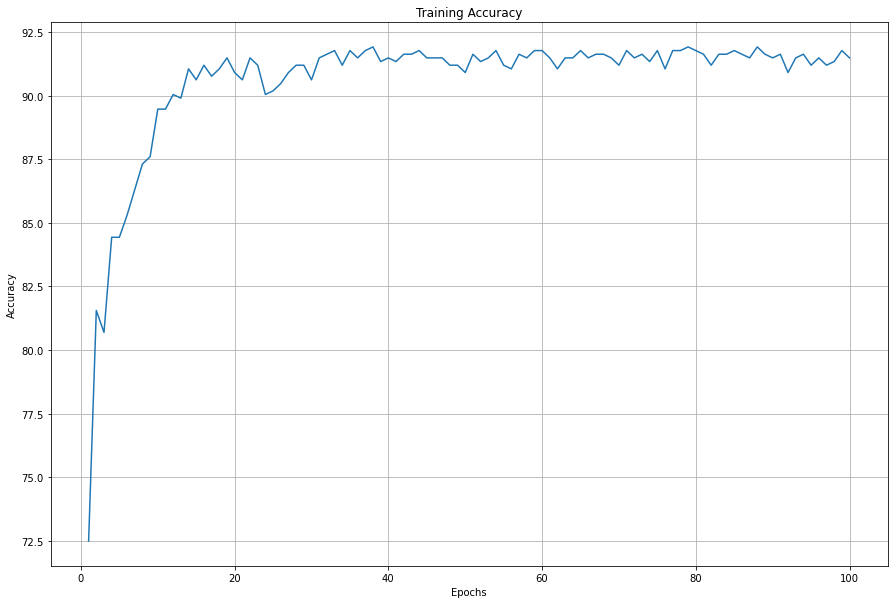

In [6]:
plt.figure(figsize=(15,10))
loss_train = history.history['accuracy']
loss_train = [i * 100 for i in loss_train]
epochs = range(1, 101)
plt.plot(epochs, loss_train)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy")
plt.grid(True)
plt.show()


### Step 6: Testing the Neural Network

In [7]:
score = model.evaluate(X_test, y_test, verbose=1)
print("Test Loss: ", score[0])
print("Test Accuracy: ", score[1])

predictions = model.predict(X_test, verbose=1)

7/7 [==============================] - 0s 2ms/step - loss: 2.0797 - accuracy: 0.7766
Test Loss:  2.079707622528076
Test Accuracy:  0.7766497731208801
7/7 [==============================] - 0s 2ms/step


### Step 7: Validate the model using Scikit-learn

We will be using F1-score, precision and recall metrics to see how the model performs and whether it is exhibiting any variance (under-fitting) problem or bias (over-fitting) problem. Naturally, the model will be optimized until we obtain satisfactory results

In [8]:
rounded = [[round(x[0])] for x in predictions]

from sklearn.metrics import f1_score
result = f1_score(y_test, rounded, labels=[0, 1], average=None)
print("F1 score: ", result)

from sklearn.metrics import precision_score
precision = precision_score(y_test, rounded, labels=[0, 1], average=None)
print("Precision: ", precision)

from sklearn.metrics import recall_score
recall = recall_score(y_test, rounded, labels=[0, 1], average=None)
print("Recall: ", recall)

F1 score:  [0.805 0.435]
Precision:  [0.802 0.643]
Recall:  [0.809 0.329]
